In [19]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


 Increasing default figure size to improve visibility:

In [142]:
seaborn.set(rc={'figure.figsize':(7,7)})

Loading the dataset:

In [85]:
data = pd.read_excel('../data/arrests.xlsx')

In [122]:
data.tail()

,Arrest Number,Case Number,Name ID,Race,Ethnicity,Sex,Age,Arrest Date,Arrest Time,Arrest Type,...,Counts,Location of Arrest,X,Y,District,Beat,datetime,dom,weekday,hour
182985,306955,18033724,663108,B,N,M,32,2018-09-30,6:57:00PM,Citation,...,1,2500 MERIDIAN PKWY,2030655,786074,D4,421,2018-09-30 18:57:00,30,6,18
182986,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,1,400 LIBERTY ST,2030877,816619,D5,522,2018-09-30 20:03:00,30,6,20
182987,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,1,400 LIBERTY ST,2030902,816594,D5,522,2018-09-30 20:03:00,30,6,20
182988,306958,18033823,106469,B,N,M,54,2018-09-30,8:55:00PM,On-View,...,1,AVONDALE DR/NANCY ST,2033592,823065,D2,212,2018-09-30 20:55:00,30,6,20
182989,306960,18033828,953418,W,H,M,43,2018-09-30,9:46:00PM,On-View,...,1,DEXTER ST/W CLUB BLVD,2029239,825015,D2,214,2018-09-30 21:46:00,30,6,21


# Analysing arrest data
### Hypothesis: most arrests will happen in central urban areas, between 8pm and 2am, on Fridays and Saturdays.



A simple histogram like the one below is of limited utility:

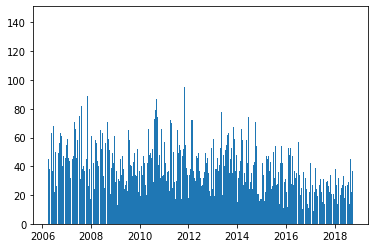

In [87]:
hist(data['Arrest Date'], bins = 5000);

First, we need to combine the 'Arrest Date' and 'Arrest Time' columns in order to create a single datetime column that we can use more easily with pandas. This requires the conversion of the 'Arrest Date' column into a string:

In [88]:
data['Arrest Date'] = data['Arrest Date'].astype(str)

Combining 'Arrest Date' and 'Arrest Time' columns:

In [89]:
data['datetime'] = data['Arrest Date'] + ' ' + data['Arrest Time']

In [90]:
data.loc[7]

Arrest Number                               189635
Case Number                                6010413
Name ID                                     369125
Race                                             W
Ethnicity                                        H
Sex                                              M
Age                                             33
Arrest Date                             2006-04-01
Arrest Time                              1:23:00AM
Arrest Type                                On-View
Sequence                                         3
UCR Code                                      1834
Statute                                     DRUGPA
Description           DRUG EQUIPMENT/PARAPHERNALIA
F/M                                              M
Counts                                           1
Location of Arrest                    900 BROAD ST
X                                          2023907
Y                                           823909
District                       

Converting new datetime column to panas datetime object:

In [91]:
data['datetime'] = data['datetime'].map(pd.to_datetime)

In [92]:
data

,Arrest Number,Case Number,Name ID,Race,Ethnicity,Sex,Age,Arrest Date,Arrest Time,Arrest Type,...,Statute,Description,F/M,Counts,Location of Arrest,X,Y,District,Beat,datetime
0,189557,6010503,109529,B,N,M,44,2006-04-01,9:17:00PM,Order For Arrest,...,FTA,FAILURE TO APPEAR,M,1,RIDGEWAY AVE/SIMA AVE,2032779,810178,D4,413,2006-04-01 21:17:00
1,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029633,825230,D2,214,2006-04-01 22:45:00
2,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029622,825129,D2,214,2006-04-01 22:45:00
3,189626,6010410,539201,B,N,M,16,2006-04-01,12:28:00AM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029075,817939,D5,522,2006-04-01 00:28:00
4,189630,6010410,640493,B,N,M,18,2006-04-01,12:28:00AM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029185,817824,D5,522,2006-04-01 00:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182985,306955,18033724,663108,B,N,M,32,2018-09-30,6:57:00PM,Citation,...,90-95(A3)6,POSSESS CONTROL SUBSTANCE SCHEDULE VI,M,1,2500 MERIDIAN PKWY,2030655,786074,D4,421,2018-09-30 18:57:00
182986,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,400 LIBERTY ST,2030877,816619,D5,522,2018-09-30 20:03:00
182987,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,15A-305(B)(2),FAIL TO APPEAR,M,1,400 LIBERTY ST,2030902,816594,D5,522,2018-09-30 20:03:00
182988,306958,18033823,106469,B,N,M,54,2018-09-30,8:55:00PM,On-View,...,20-138.1,DRIVING WHILE IMPAIRED,M,1,AVONDALE DR/NANCY ST,2033592,823065,D2,212,2018-09-30 20:55:00


We can now add some additional columns that will enable more precise and insightful data visualisation:

In [93]:
def get_dom(dt):
    return dt.day

data['dom'] = data['datetime'].map(get_dom)

In [94]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['datetime'].map(get_weekday)

In [95]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['datetime'].map(get_hour)

In [96]:
data

,Arrest Number,Case Number,Name ID,Race,Ethnicity,Sex,Age,Arrest Date,Arrest Time,Arrest Type,...,Counts,Location of Arrest,X,Y,District,Beat,datetime,dom,weekday,hour
0,189557,6010503,109529,B,N,M,44,2006-04-01,9:17:00PM,Order For Arrest,...,1,RIDGEWAY AVE/SIMA AVE,2032779,810178,D4,413,2006-04-01 21:17:00,1,5,21
1,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,1,W CLUB BLVD/WASHINGTON ST,2029633,825230,D2,214,2006-04-01 22:45:00,1,5,22
2,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,1,W CLUB BLVD/WASHINGTON ST,2029622,825129,D2,214,2006-04-01 22:45:00,1,5,22
3,189626,6010410,539201,B,N,M,16,2006-04-01,12:28:00AM,On-View,...,1,200 FOSTER ST,2029075,817939,D5,522,2006-04-01 00:28:00,1,5,0
4,189630,6010410,640493,B,N,M,18,2006-04-01,12:28:00AM,On-View,...,1,200 FOSTER ST,2029185,817824,D5,522,2006-04-01 00:28:00,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182985,306955,18033724,663108,B,N,M,32,2018-09-30,6:57:00PM,Citation,...,1,2500 MERIDIAN PKWY,2030655,786074,D4,421,2018-09-30 18:57:00,30,6,18
182986,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,1,400 LIBERTY ST,2030877,816619,D5,522,2018-09-30 20:03:00,30,6,20
182987,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,1,400 LIBERTY ST,2030902,816594,D5,522,2018-09-30 20:03:00,30,6,20
182988,306958,18033823,106469,B,N,M,54,2018-09-30,8:55:00PM,On-View,...,1,AVONDALE DR/NANCY ST,2033592,823065,D2,212,2018-09-30 20:55:00,30,6,20


## Visual analysis

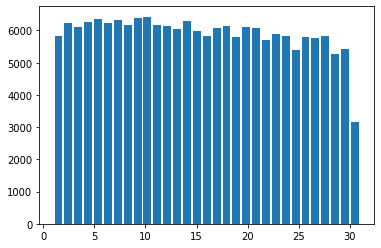

In [102]:
hist(data.dom, bins = 31, rwidth = .8);

In [104]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

##### Analysing the hour

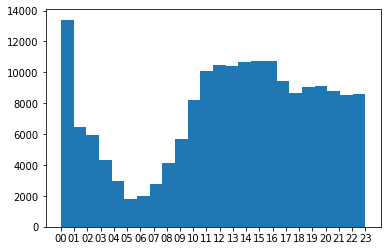

In [131]:
hist(data.hour, bins=24);
xticks(range(24), '00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23'.split());

##### Analysing the day of the week 

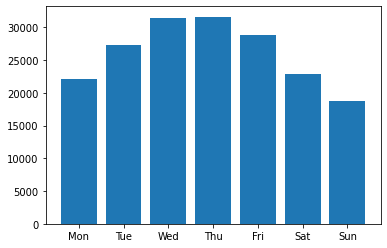

In [129]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=.8)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

##### Combining the two in a cross analysis

In [139]:
cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

In [140]:
cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1513,702,657,504,303,207,221,375,593,761,...,1346,1290,1344,1090,1040,1098,1163,1007,1003,1034
1,1767,776,583,470,364,187,241,425,620,890,...,1830,1996,1844,1476,1254,1341,1270,1102,1121,1134
2,2266,832,778,494,351,204,236,482,722,986,...,1996,2082,2129,1815,1571,1563,1534,1439,1368,1336
3,2508,1041,777,595,354,247,293,381,607,1048,...,2031,1945,1831,1909,1673,1561,1523,1447,1474,1474
4,2200,940,899,609,373,228,279,404,719,882,...,1684,1623,1682,1404,1323,1375,1405,1470,1411,1371
5,1625,1149,1120,775,643,353,364,377,494,665,...,957,1017,1121,1022,1046,1272,1273,1389,1236,1289
6,1526,1042,1157,849,545,349,366,337,378,474,...,853,783,805,742,773,856,942,939,894,947


''

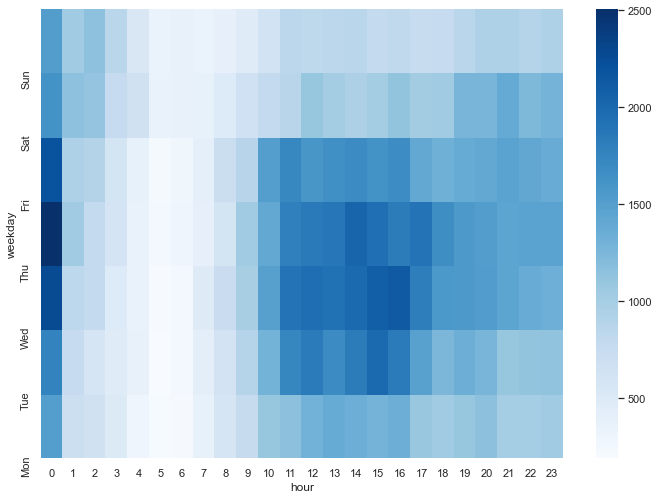

In [156]:
heatmap = seaborn.heatmap(cross, cmap='Blues')
yticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
heatmap.invert_yaxis()
;